## Module 10 

# import necessary libraries

In [3]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import imdb

## IMDB

# Build train and save the model

Epoch 1/30
40/40 [==============================] - 4s 60ms/step - loss: 0.4743 - accuracy: 0.8051 - val_loss: 0.3438 - val_accuracy: 0.8772
Epoch 2/30
40/40 [==============================] - 1s 18ms/step - loss: 0.2810 - accuracy: 0.9000 - val_loss: 0.2884 - val_accuracy: 0.8864
Epoch 3/30
40/40 [==============================] - 1s 18ms/step - loss: 0.2143 - accuracy: 0.9250 - val_loss: 0.2924 - val_accuracy: 0.8844
Epoch 4/30
40/40 [==============================] - 1s 18ms/step - loss: 0.1774 - accuracy: 0.9390 - val_loss: 0.3086 - val_accuracy: 0.8800
Epoch 5/30
40/40 [==============================] - 1s 19ms/step - loss: 0.1547 - accuracy: 0.9456 - val_loss: 0.2992 - val_accuracy: 0.8862


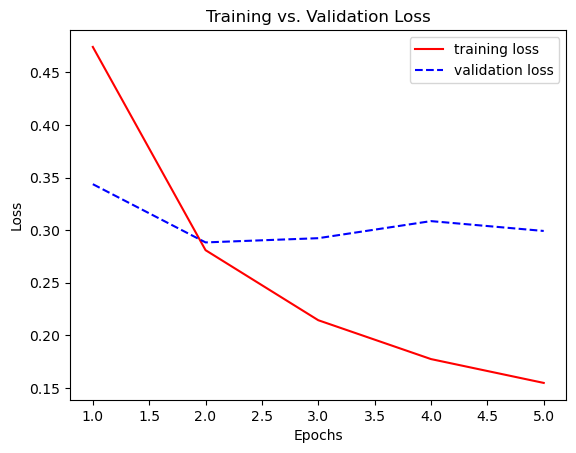

INFO:tensorflow:Assets written to: model_imdb\assets


INFO:tensorflow:Assets written to: model_imdb\assets


In [4]:
# Import the Imdb class
from imdb import Imdb

# Create an instance of Imdb
imdb_classifier = Imdb()

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb_classifier.load_data()

# Vectorize the sequences
x_train = imdb_classifier.vectorize_sequences(train_data)
x_test = imdb_classifier.vectorize_sequences(test_data)

# Convert labels to float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

imdb_classifier.model = imdb_classifier.build_model()
imdb_classifier.compile()

imdb_classifier.fit(x_train, y_train)

imdb_classifier.plot_training_history()

imdb_classifier.save_model('model_imdb')


# Import saved model and test the model accuracy

In [5]:
from keras.models import load_model
x_test = imdb_classifier.vectorize_sequences(test_data)
model = load_model("model_imdb")

predictions =  imdb_classifier.model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


In [6]:
(test_data, test_labels) = imdb_classifier.load_data()[1]
results = imdb_classifier.model.evaluate(x_test, test_labels)
print('Test Loss:', results[0])
#print("Test Accuracy: {:.2%}".format(results[1]))
print("Accuracy:{:.2%}".format(results[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.3119 - accuracy: 0.8790
Test Loss: 0.3119191527366638
Accuracy:87.90%


In [5]:
print(predictions)
binary_predictions = (predictions > 0.5).astype('int')

[[0.3209731 ]
 [0.9999527 ]
 [0.6640976 ]
 ...
 [0.13308622]
 [0.0945896 ]
 [0.5436591 ]]


## Boston Housing

Epoch 1/200
323/323 [==============================] - 3s 6ms/step - loss: 0.3598 - mae: 0.3872 - val_loss: 0.2210 - val_mae: 0.3044
Epoch 2/200
323/323 [==============================] - 2s 5ms/step - loss: 0.2119 - mae: 0.2781 - val_loss: 0.2025 - val_mae: 0.2995
Epoch 3/200
323/323 [==============================] - 2s 5ms/step - loss: 0.1851 - mae: 0.2605 - val_loss: 0.1719 - val_mae: 0.2765
Epoch 4/200
323/323 [==============================] - 2s 6ms/step - loss: 0.1551 - mae: 0.2366 - val_loss: 0.1670 - val_mae: 0.2972
Epoch 5/200
323/323 [==============================] - 2s 6ms/step - loss: 0.1330 - mae: 0.2233 - val_loss: 0.1801 - val_mae: 0.3310
Epoch 6/200
323/323 [==============================] - 2s 6ms/step - loss: 0.1210 - mae: 0.2249 - val_loss: 0.1317 - val_mae: 0.2705
Epoch 7/200
323/323 [==============================] - 2s 6ms/step - loss: 0.1108 - mae: 0.2103 - val_loss: 0.1702 - val_mae: 0.2966
Epoch 8/200
323/323 [==============================] - 2s 5ms/step - 

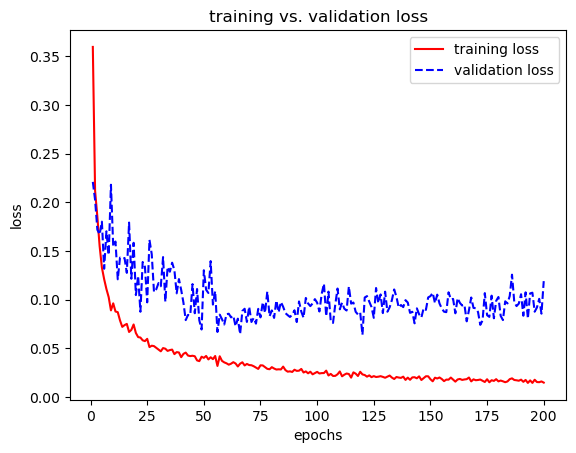

INFO:tensorflow:Assets written to: model_boston_housing\assets


INFO:tensorflow:Assets written to: model_boston_housing\assets


In [3]:
from boston_housing import Boston_housing
bh = Boston_housing()

(train_data, train_labels), (test_data, test_labels) = bh.load_data()

#Normalize data
x_train = bh.normalize_data(train_data)
x_test = bh.normalize_data(test_data)

y_train = bh.normalize_data(train_labels)
y_test = bh.normalize_data(test_labels)


bh.model = bh.build_model(x_train.shape[1])


# Train the model
bh.fit(x_train, y_train)

# Plot the training history
bh.plot_training_history()

# Save the model
bh.save_model('model_boston_housing')

# Import model and test the model performance

In [7]:
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = load_model("model_boston_housing")


predictions =  bh.model.predict(x_test)
(test_data, test_labels) = bh.load_data()[1]
#results = bh.model.evaluate(x_test, test_labels)
mae = mean_absolute_error(test_labels, predictions)
mse = mean_squared_error(test_labels, predictions)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

4/4 [==============================] - 0s 5ms/step
Mean Absolute Error: 23.05
Mean Squared Error: 599.60


## Reuters

# BUild model and evaluate the model performance

Epoch 1/50
57/57 [==============================] - 3s 19ms/step - loss: 3.2226 - accuracy: 0.2466 - val_loss: 2.5427 - val_accuracy: 0.4725
Epoch 2/50
57/57 [==============================] - 1s 11ms/step - loss: 2.0956 - accuracy: 0.5486 - val_loss: 1.7410 - val_accuracy: 0.5988
Epoch 3/50
57/57 [==============================] - 0s 8ms/step - loss: 1.5884 - accuracy: 0.6342 - val_loss: 1.4839 - val_accuracy: 0.6644
Epoch 4/50
57/57 [==============================] - 1s 9ms/step - loss: 1.3868 - accuracy: 0.6843 - val_loss: 1.3585 - val_accuracy: 0.6950
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 1.2584 - accuracy: 0.7093 - val_loss: 1.2749 - val_accuracy: 0.7129
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 1.1637 - accuracy: 0.7264 - val_loss: 1.2485 - val_accuracy: 0.7151
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 1.0860 - accuracy: 0.7413 - val_loss: 1.1801 - val_accuracy: 0.7334
Epoch 8/50
57/57 [

INFO:tensorflow:Assets written to: Reuters_model\assets


Plotting Training and Validation Loss


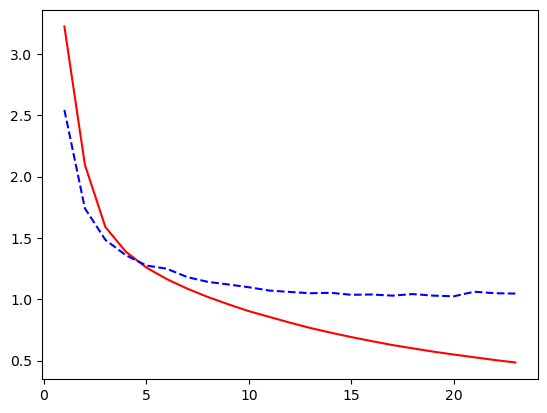

71/71 [==============================] - 1s 3ms/step - loss: 1.1051 - accuracy: 0.7605
Test Accuracy: 76.05%
Test Loss: 1.1051


In [1]:
from keras.models import load_model
from reuters import Reuters

reuters = Reuters()

reuters.build_model()

# Load the saved model
model = load_model('Reuters_model')

test_loss, test_accuracy = model.evaluate(reuters.vectorize_sequences(reuters.test_data), reuters.test_labels)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')
